# Pertanyaan terkait KMeans

In [24]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

In [25]:
df_raw = pd.read_csv("./data/Mall_Customers.csv")
df_raw.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
58,59,Female,27,46,51
40,41,Female,65,38,35
34,35,Female,49,33,14
102,103,Male,67,62,59
184,185,Female,41,99,39


In [26]:
# Kmeans tidak baik untuk kategorikal. Mari kita hilangkan yang kategorikal (Gender) dan yang tidak digunakan (Customer ID)
df_raw_drop = df_raw.drop(axis=1, columns=["Gender", "CustomerID"])
df_raw_drop.sample(5)

,Age,Annual Income (k$),Spending Score (1-100)
81,38,54,55
168,36,87,27
49,31,40,42
119,50,67,57
181,32,97,86


In [27]:
# Cek korelasi tertinggi yuk, biar kelihatan nanti pas klusterisasinya
df_raw_drop.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


Korelasi tertinggi pada Age dan Spending Score. Mari kita coba ambil itu

In [28]:
df_raw_ambil = df_raw_drop.drop(axis=1, columns=["Annual Income (k$)"])
df_raw_ambil

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [29]:
# Lihat manual dari library KMeans-nya
?KMeans

In [30]:
# Kalau dilihat dari librarynya, kita harus buat inputannya mirip dengan contohnya
X = df_raw_ambil.to_numpy()
X

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [32]:
# Mari kita cari tahu di k berapa model yang terbaik. Kita lakukan percobaan dari k 1 - 10
# Baik tidaknya suatu kluster ditentukan dari nilai inertia. Kita akan save nilai inertia dari setiap k
inertia = []
for k in range(1,11):
    print("Iterasi untuk k", k)
    # Siapkan modelnya
    k_model = KMeans(n_clusters=k, random_state=0).fit(X)
    # Mari kita save inertianya untuk setiap iterasi
    inertia.append(k_model.inertia_)

Iterasi untuk k 1
Iterasi untuk k 2
Iterasi untuk k 3
Iterasi untuk k 4
Iterasi untuk k 5
Iterasi untuk k 6
Iterasi untuk k 7
Iterasi untuk k 8
Iterasi untuk k 9
Iterasi untuk k 10


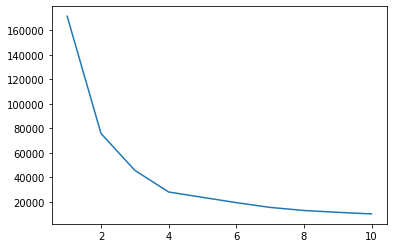

In [38]:
plt.plot([k for k in range(1,11)], inertia)

Sedikit sulit untuk dilihat, tapi kemungkinan k=4

# Versi Dicoding

In [44]:
df_decoding = df_raw.drop(axis=1, columns=['CustomerID', 'Gender'])
df_decoding.sample(5)

,Age,Annual Income (k$),Spending Score (1-100)
196,45,126,28
127,40,71,95
55,47,43,41
141,32,75,93
2,20,16,6


In [45]:
X = df_decoding.to_numpy()
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [46]:
# Mari kita cari tahu di k berapa model yang terbaik. Kita lakukan percobaan dari k 1 - 10
# Baik tidaknya suatu kluster ditentukan dari nilai inertia. Kita akan save nilai inertia dari setiap k
inertia = []
for k in range(1,11):
    print("Iterasi untuk k", k)
    # Siapkan modelnya
    k_model = KMeans(n_clusters=k, random_state=0).fit(X)
    # Mari kita save inertianya untuk setiap iterasi
    inertia.append(k_model.inertia_)

Iterasi untuk k 1
Iterasi untuk k 2
Iterasi untuk k 3
Iterasi untuk k 4
Iterasi untuk k 5
Iterasi untuk k 6
Iterasi untuk k 7
Iterasi untuk k 8
Iterasi untuk k 9
Iterasi untuk k 10


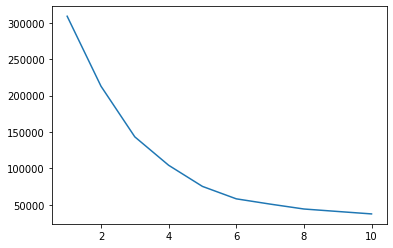

In [47]:
plt.plot([k for k in range(1,11)], inertia)

Eh.... Ini gimana wkwkwk